<a href="https://colab.research.google.com/github/profRCC/Softex/blob/master/Analisando_Cancer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados de Câncer de Mama**

* Dataset com atributos de nódulos identificados em imagens digitais de exames de mama. Dados descrevem características do núcleo celular presentes na imagem e o diagnóstico associado (maligno ou benigno).
* [Breast Cancer Wiscosing Data Set](https://https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)
* Atributos numéricos descrevem:
 * raio
 * textura
 * perímetro
 * area
 * suavidade
 * compacidade
 * concavidade
 * simetria
 * dimensão fractal
* 570 instâncias
* Problema de classificação binária



**Montando ambiente no Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## 1. Importar bibliotecas necessárias

#### Utlizaremos as bibliotecas pandas e numpy para a manipulação dos dados
<a href="https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355">Tutorial Numpy</a>

<a href="https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1">Tutorial Pandas</a>

In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd

## 2. Carregamento dos dados na memória utilizando a biblioteca Pandas

Utilizaremos um DataFrame Pandas para ler os dados do dataset brest_cancer.csv

In [ ]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Softex/Semana1/datasets/cancer/breast_cancer.csv')

In [ ]:
# verificando o dataframe
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#verificando colunas dos dados
dados.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## 3. Limpeza e organização dos dados

In [ ]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [ ]:
#excluir colunas irrelevantes
dados = dados.drop(columns=['id'])
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#trocando o tipo do atributo diagnostico por um tipo numerico
dados['diagnosis'] = dados['diagnosis'].replace(['M','B'],[1,0])
dados.head(30)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


## 4. Análise preliminar dos dados

In [ ]:
# importando biblioteca para plotar gráficos
import matplotlib.pyplot as plt

#### Histograma

* Representação gráfica da distribuição de frequência de um conjunto de dados
* Os dados são divididos em classes e é feita uma contagem das ocorrências dos dados nessas classes

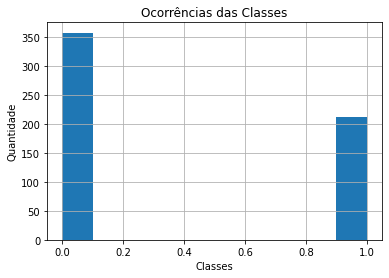

In [ ]:
#verificando ocorrências das classes
plt.hist(dados['diagnosis'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

In [ ]:
#contando quantidades de ocorrencias de cada classe
print('Benigno:',dados[dados['diagnosis']==0].shape[0])
print('Maligno:',dados[dados['diagnosis']==1].shape[0])

Benigno: 357
Maligno: 212


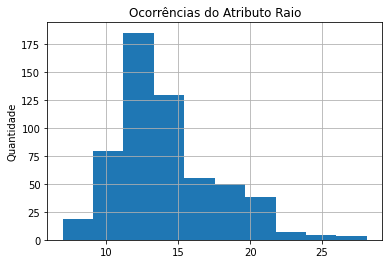

In [ ]:
#verificando ocorrências do atributo raio
plt.hist(dados['radius_mean'],10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo Raio')
plt.grid(True)
plt.show()

### Distribuição de probabilidade

* O histograma exibe frequências de ocorrências dos valores em n classes discretas
* A distribuição de probabilidade não discretiza os dados

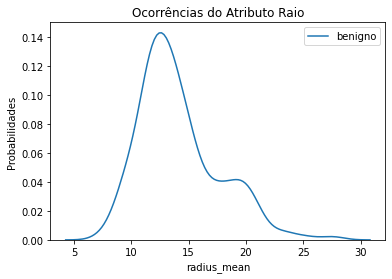

In [ ]:
import seaborn as sns

sns.distplot(dados.radius_mean, hist=False, rug=False,label='benigno')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Raio')
plt.show()

### BoxPlot

* Análise visual da posição e dispersão dos dados
* Mediana e Quartis
* Pontos fora da curva

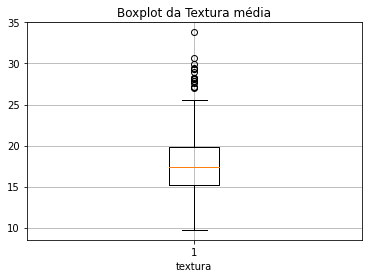

In [ ]:
plt.boxplot(dados.texture_mean)
plt.title('Boxplot da Textura média')
plt.xlabel('textura')
plt.grid()
plt.show()

### Análise comparativa dos atributos entre as classes

In [ ]:
#criando dataframe apenas para os nodulos benignos
benigno = dados[dados['diagnosis']==0].drop(columns=['diagnosis']).reset_index(drop=True)

In [ ]:
#criando dataframe apenas para os nodulos benignos
maligno = dados[dados['diagnosis']==1].drop(columns=['diagnosis']).reset_index(drop=True)

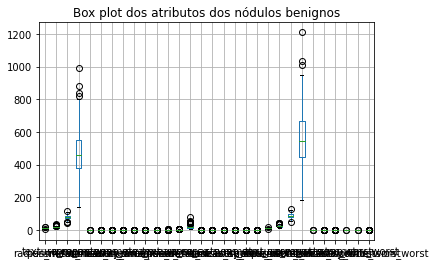

In [ ]:
#plotando boxplots dos dados das instâncias benignas
benigno.boxplot()
plt.title('Box plot dos atributos dos nódulos benignos')
plt.show()

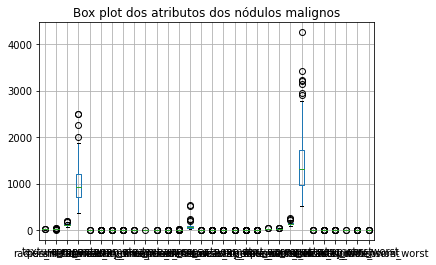

In [ ]:
#plotando boxplots dos dados das instâncias malignas
maligno.boxplot()
plt.title('Box plot dos atributos dos nódulos malignos')
plt.show()

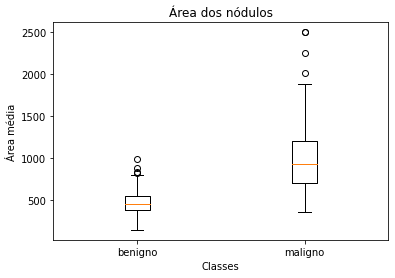

In [ ]:
# box plot comparando o perimetro medio para as duas classes
plt.boxplot([benigno.area_mean,maligno.area_mean],labels=['benigno','maligno'])
plt.xlabel('Classes')
plt.ylabel('Área média')
plt.title('Área dos nódulos')
plt.show()

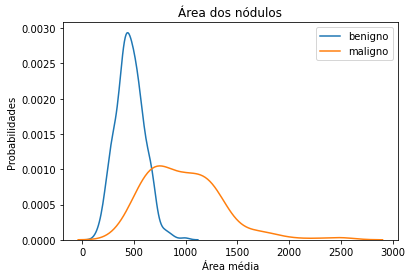

In [ ]:
# distribuição de probabilidade comparando a area media para as duas classes
sns.distplot(benigno.area_mean, hist=False, rug=False,label='benigno')
sns.distplot(maligno.area_mean, hist=False, rug=False,label='maligno')
plt.xlabel('Área média')
plt.ylabel('Probabilidades')
plt.title('Área dos nódulos')
plt.show()

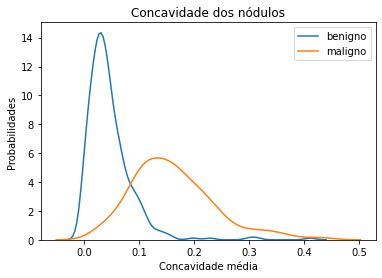

In [ ]:
# distribuição de probabilidade comparando a area media para as duas classes
sns.distplot(benigno.concavity_mean, hist=False, rug=False,label='benigno')
sns.distplot(maligno.concavity_mean, hist=False, rug=False,label='maligno')
plt.xlabel('Concavidade média')
plt.ylabel('Probabilidades')
plt.title('Concavidade dos nódulos')
plt.show()

##  Análise estatística dos dados

Média

$\mu = \dfrac{1}{n}\sum_{i=1}^n{x_i}$

In [ ]:
# estatistica basica dos dados - media
benigno.mean()

radius_mean                 12.146524
texture_mean                17.914762
perimeter_mean              78.075406
area_mean                  462.790196
smoothness_mean              0.092478
compactness_mean             0.080085
concavity_mean               0.046058
concave points_mean          0.025717
symmetry_mean                0.174186
fractal_dimension_mean       0.062867
radius_se                    0.284082
texture_se                   1.220380
perimeter_se                 2.000321
area_se                     21.135148
smoothness_se                0.007196
compactness_se               0.021438
concavity_se                 0.025997
concave points_se            0.009858
symmetry_se                  0.020584
fractal_dimension_se         0.003636
radius_worst                13.379801
texture_worst               23.515070
perimeter_worst             87.005938
area_worst                 558.899440
smoothness_worst             0.124959
compactness_worst            0.182673
concavity_wo

Desvio padrão

$var = \dfrac{1}{n}\sum_{i=1}^n(x_i - \mu_x)^2$

$\sigma = \sqrt{var}$

In [ ]:
# estatistica basica dos dados - desvio padrao
benigno.std()

radius_mean                  1.780512
texture_mean                 3.995125
perimeter_mean              11.807438
area_mean                  134.287118
smoothness_mean              0.013446
compactness_mean             0.033750
concavity_mean               0.043442
concave points_mean          0.015909
symmetry_mean                0.024807
fractal_dimension_mean       0.006747
radius_se                    0.112570
texture_se                   0.589180
perimeter_se                 0.771169
area_se                      8.843472
smoothness_se                0.003061
compactness_se               0.016352
concavity_se                 0.032918
concave points_se            0.005709
symmetry_se                  0.006999
fractal_dimension_se         0.002938
radius_worst                 1.981368
texture_worst                5.493955
perimeter_worst             13.527091
area_worst                 163.601424
smoothness_worst             0.020013
compactness_worst            0.092180
concavity_wo

In [ ]:
#media do atributo simetria
maligno.symmetry_mean.mean()

0.19290896226415097

In [ ]:
#mediana do atributo simetria
maligno.symmetry_mean.median()

0.1899

In [ ]:
#amplitude do atributo simetria
'Min:',maligno.symmetry_mean.max(),'Max:',maligno.symmetry_mean.min()

('Min:', 0.304, 'Max:', 0.1308)

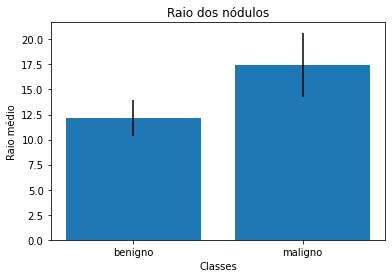

In [ ]:
# gráfico de barras comparando a média e desvio padrão do raio medio para as duas classes
plt.bar(['benigno','maligno'],[benigno.radius_mean.mean(),maligno.radius_mean.mean()],yerr=[benigno.radius_mean.std(),maligno.radius_mean.std()])
plt.xlabel('Classes')
plt.ylabel('Raio médio')
plt.title('Raio dos nódulos')
plt.show()

## Estudo de correlação entre atributos

* Estudo da relação estatística entre duas variáveis
* Como uma variável se comporta quando a outra varia
* Dá ideia de quanto de uma variável pode ser usada para explicar a outra
* Correlação não implica causalidade

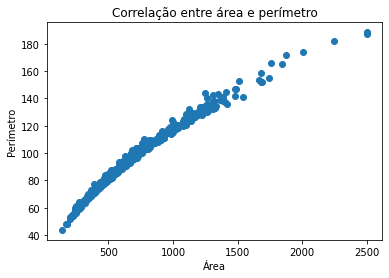

In [ ]:
# plotando correlação entre area media e perimetro medio
plt.scatter(dados.area_mean,dados.perimeter_mean)
plt.xlabel('Área')
plt.ylabel('Perímetro')
plt.title('Correlação entre área e perímetro')
plt.show()

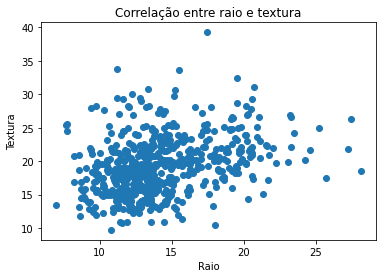

In [ ]:
# plotando correlação entre raio medio e textura
plt.scatter(dados.radius_mean,dados.texture_mean)
plt.xlabel('Raio')
plt.ylabel('Textura')
plt.title('Correlação entre raio e textura')
plt.show()

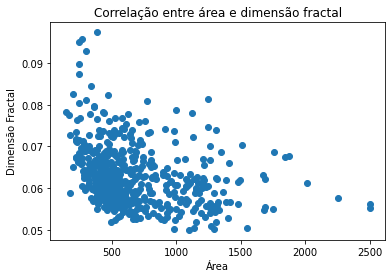

In [ ]:
# plotando correlação entre area media e dimensão fractal
plt.scatter(dados.area_mean,dados.fractal_dimension_mean)
plt.xlabel('Área')
plt.ylabel('Dimensão Fractal')
plt.title('Correlação entre área e dimensão fractal')
plt.show()

Coeficiente de correlação
* medida numérica do grau de relação entre duas variáveis quantitativas
* coeficiente de correlação de Pearson ($\rho$):

\begin{equation}
\rho = \dfrac{\sum_{i=1}^n(x_i - \overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^n(x_i - \overline{x})^2}\sqrt{\sum_{i=1}^n(y_i - \overline{y})^2}} = \dfrac{cov(X,Y)}{\sqrt{var(X)var(Y)}}
\end{equation}

* varia entre [-1,1]

In [ ]:
# calculando o coeficiente de correlação entre duas colunas
corr = dados['area_mean'].corr(dados['perimeter_mean'])
corr

0.9865068039913902

In [ ]:
corr = dados.radius_mean.corr(dados.texture_mean)
corr

0.323781890927733

In [ ]:
corr = dados.area_mean.corr(dados.fractal_dimension_mean)
corr

-0.2831098116914262

Correlação entre atributos e atributo de classe

In [ ]:
#calculando a correlacao entre um atributo descritor e o atributo de classe
corr = dados.diagnosis.corr(dados.area_mean)
corr

0.7089838365853891

In [ ]:
#calculando a correlacao entre um atributo descritor e o atributo de classe
corr = dados.diagnosis.corr(dados.texture_mean)
corr

0.41518529984520364

In [ ]:
#calculando a correlação entre todos os atributos e o atributo de classe
for col in dados.columns[1:]:
    print(col,': ',round(dados.diagnosis.corr(dados[col]),2))

radius_mean :  0.73
texture_mean :  0.42
perimeter_mean :  0.74
area_mean :  0.71
smoothness_mean :  0.36
compactness_mean :  0.6
concavity_mean :  0.7
concave points_mean :  0.78
symmetry_mean :  0.33
fractal_dimension_mean :  -0.01
radius_se :  0.57
texture_se :  -0.01
perimeter_se :  0.56
area_se :  0.55
smoothness_se :  -0.07
compactness_se :  0.29
concavity_se :  0.25
concave points_se :  0.41
symmetry_se :  -0.01
fractal_dimension_se :  0.08
radius_worst :  0.78
texture_worst :  0.46
perimeter_worst :  0.78
area_worst :  0.73
smoothness_worst :  0.42
compactness_worst :  0.59
concavity_worst :  0.66
concave points_worst :  0.79
symmetry_worst :  0.42
fractal_dimension_worst :  0.32


In [ ]:
# correlaçao entre os atributos
corr = dados.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


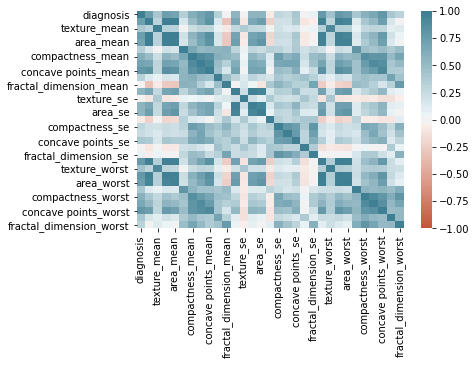

In [ ]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

In [ ]:
corr = dados[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']].corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000


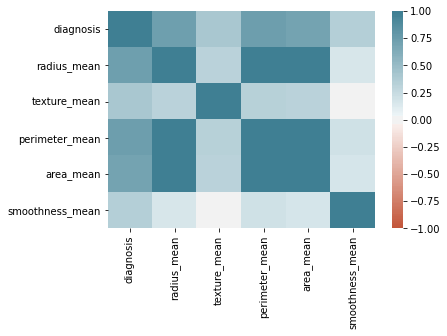

In [ ]:
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

## 5. Re-escala dos dados

* Em diversas situações, os atributos posuem escalas bem diferentes
* Uma das etapas da modelagem de algorimos de aprendizage é a re-escala dos dados 
* Evitar que a escala dos atributos acabem influenciando na aprendizagem

In [ ]:
#verificando dados novamente
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#recuperando valores de textura
textura = dados.texture_mean
textura

0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: texture_mean, Length: 569, dtype: float64

In [ ]:
#recuperando dados de area
area = dados.area_mean
area

0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 569, dtype: float64

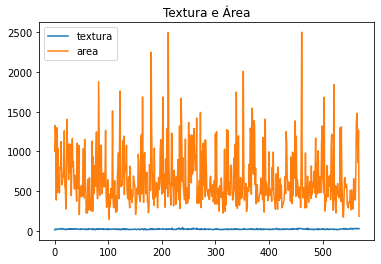

In [ ]:
#plotando textura e area em um mesmo gráfico
plt.plot(textura,label='textura')
plt.plot(area,label='area')
plt.title('Textura e Área')
plt.legend()
plt.show()

### Re-escala pelo máximo


$x_{norm} = \dfrac{x}{max(x)}$

In [ ]:
textura = textura/textura.max()

In [ ]:
area = area/area.max()

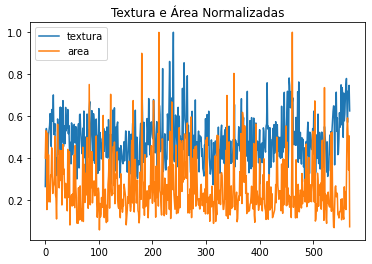

In [ ]:
#plotando textura e area em um mesmo gráfico
plt.plot(textura,label='textura')
plt.plot(area,label='area')
plt.title('Textura e Área Normalizadas')
plt.legend()
plt.show()

In [ ]:
#funcao de reescala pelo maximo
def reescalaMax(dados):
    return dados/dados.max()

### Re-escala usando maximo e minimo

$x_{norm} = \dfrac{x-min(x)}{max(x)-min(x)}$

In [ ]:
#carregando dados de textura e area
textura = dados.texture_mean
area = dados.area_mean

In [ ]:
textura = (textura-textura.min())/(textura.max()-textura.min())

In [ ]:
area = (area-area.min())/(area.max()-area.min())

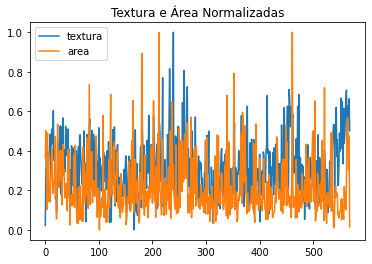

In [ ]:
#plotando textura e area em um mesmo gráfico
plt.plot(textura,label='textura')
plt.plot(area,label='area')
plt.title('Textura e Área Normalizadas')
plt.legend()
plt.show()

In [ ]:
def reescalaMaxMin(dados):
    return (dados - dados.min())/(dados.max()-dados.min())

### Re-escala usando média e desvio padrão

$x_{norm} = \dfrac{(x - \mu)}{\sigma}$

In [ ]:
#carregando dados de textura e area
textura = dados.texture_mean
area = dados.area_mean

In [ ]:
textura = (textura-textura.mean())/textura.std()

In [ ]:
area = (area- area.mean())/area.std()

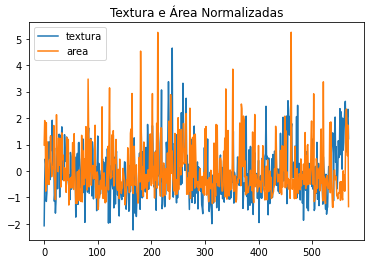

In [ ]:
#plotando textura e area em um mesmo gráfico
plt.plot(textura,label='textura')
plt.plot(area,label='area')
plt.title('Textura e Área Normalizadas')
plt.legend()
#plt.show()
plt.savefig('textura_area_norm.jpg')